<a href="https://colab.research.google.com/github/Byeon-MJ/Computer_Vision_Project/blob/main/Cats_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tensorflow 버전 확인
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# # dataset 다운로드
# from urllib.request import urlretrieve
# urlretrieve('http://doc.mindscale.kr/km/unstructured/dog-vs-cat.zip','dog-vs-cat.zip')

In [ ]:
# # zip 파일 압축 해제
# from zipfile import ZipFile
# with ZipFile('dog-vs-cat.zip') as z:
#     z.extractall()

In [ ]:
# # dataset을 구글 드라이브로 이동
# !rm -rf /content/gdrive/MyDrive/CV/Cats\ vs\ Dogs/dog-vs-cat
# !mv dog-vs-cat /content/gdrive/MyDrive/CV/Cats\ vs\ Dogs/dog-vs-cat

In [ ]:
# # 다운로드 파일 제거
# !rm dog-vs-cat.zip

In [ ]:
# import os
# path = os.getcwd()
# print(path)

In [ ]:
# 구글 드라이브 dataset 확인
!ls /content/gdrive/MyDrive/CV/Cats\ vs\ Dogs/dog-vs-cat

train  validation


In [ ]:
# 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [ ]:
image_height = 150  # 이미지 높이
image_width = 150   # 이미지 넓이
batch_size = 10     # batch size
no_of_epochs = 50   # traning 횟수

In [ ]:
# ImageDataGenerator 를 통해 train_datagen 인스턴스 생성
train_datagen = ImageDataGenerator(
            rescale = 1./255,           # 픽셀 값 0~1 범위로 변환
            rotation_range = 40,        # 40도 회전
            width_shift_range = 0.2,    # 20%까지 좌우 회전
            height_shift_range = 0.2,   # 20%까지 상하 이동
            shear_range = 0.2,          # 20%까지 기울임
            zoom_range = 0.2,           # 20%까지 확대
            horizontal_flip = True,     # 좌우 반전
)

In [ ]:
# train_datatgen 인스턴스를 통해 train dataset 에서 한번에 batch_size 만큼 이미지를 만들어내는 train_generator 객체 생성
train_generator = train_datagen.flow_from_directory(
    'gdrive/MyDrive/CV/Cats vs Dogs/dog-vs-cat/train',
    batch_size = 10,                            # batch size 정의
    class_mode = 'binary',                      # "binary" 1D binary labels
    target_size = (image_width, image_height))  # 이미지 크기 재정의

Found 2000 images belonging to 2 classes.


In [ ]:
# validation dataset에서 test_generator 객체 생성
test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    'gdrive/MyDrive/CV/Cats vs Dogs/dog-vs-cat/validation',
    batch_size = 10,
    class_mode = 'binary',
    target_size = (image_width, image_height))

Found 800 images belonging to 2 classes.


In [ ]:
# validation dataset에서 pred_generator 객체 생성
pred_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    'gdrive/MyDrive/CV/Cats vs Dogs/dog-vs-cat/validation',
    batch_size = 1,
    class_mode = 'binary',
    target_size = (image_width, image_height))

Found 800 images belonging to 2 classes.


In [ ]:
# train_generator 가 만들어 낸 이미지의 클래스 index 확인
print(train_generator.class_indices)

{'cat': 0, 'dog': 1}


In [ ]:
# label name 찾는 함수 정의
def findKey(indices, search_value):
    for key, value in indices.items():
        if(value == search_value):
            return key
    return -1

Found 2000 images belonging to 2 classes.


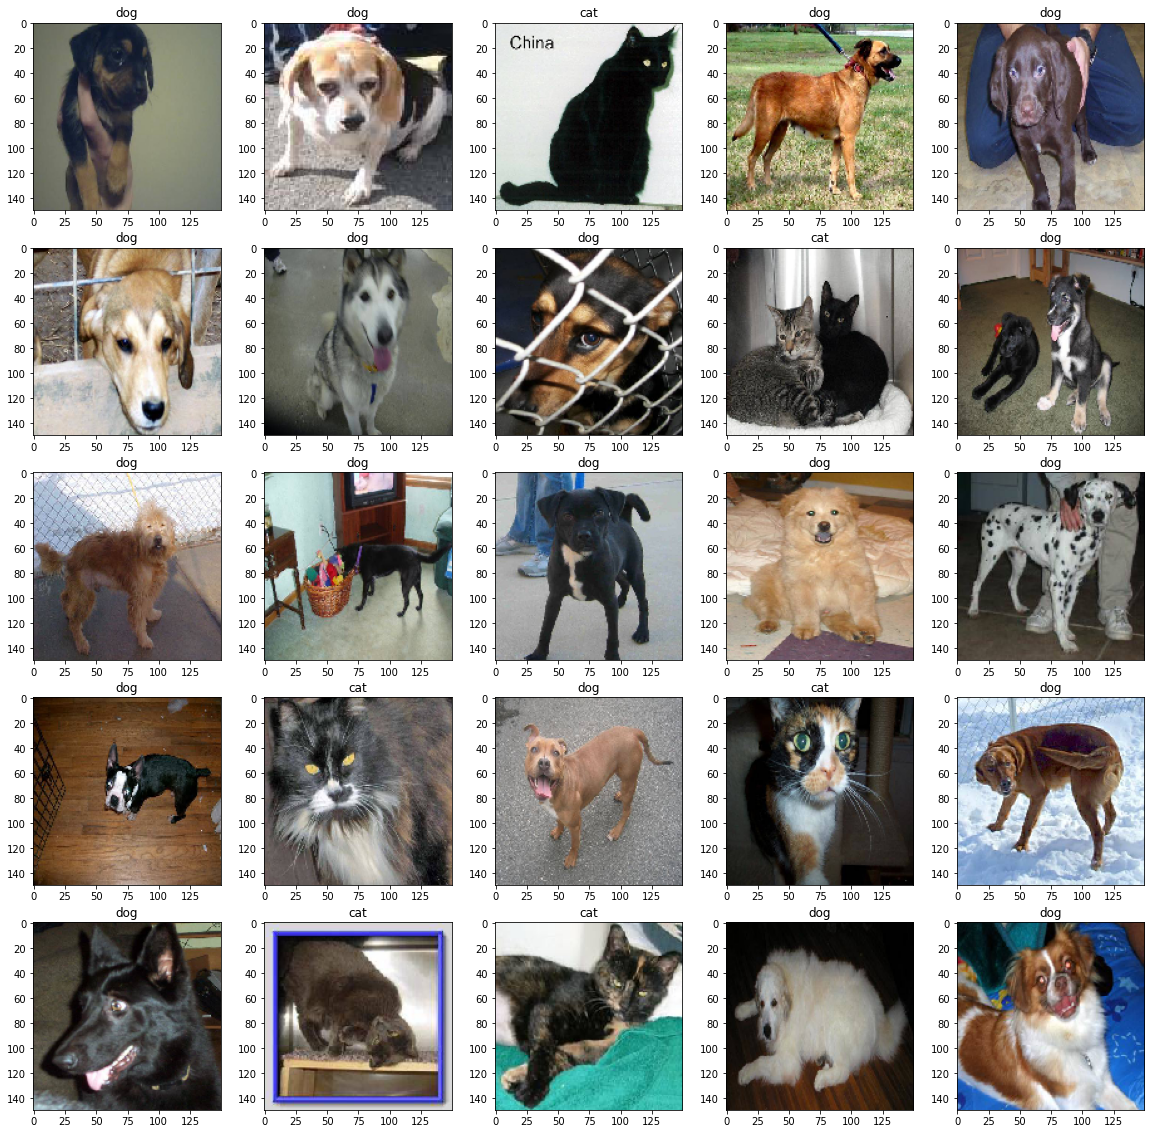

In [ ]:
# train dataset 에서 샘플 데이터 display
for X_batch, y_batch in ImageDataGenerator(rescale = 1./255).flow_from_directory('gdrive/MyDrive/CV/Cats vs Dogs/dog-vs-cat/train',
                                                                                 batch_size = 25, class_mode = 'binary', target_size = (150, 150)):
    plt.figure(figsize = (20, 20))
    # create a grid of 5x5 images
    for i in range(0, 25):
        ax = plt.subplot(5, 5, i+1)
        ax.set_title(findKey(train_generator.class_indices, y_batch[i]))    # 이미지의 label name 을 찾아준다.
        plt.imshow((X_batch[i].reshape(150, 150, 3)*255).astype(np.uint8))  # train 샘플 이미지를 보여준다.
    # show the plot
    plt.show()
    break

In [ ]:
# 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# 모델 학습시 정확도를 모니터링하여 조기에 학습 종료시키는 인스턴스 정의
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
# model training
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=2000//batch_size,
                              epochs=no_of_epochs,
                              validation_data=test_generator,
                              validation_steps=800//batch_size,
                              callbacks=[monitor_val_acc]) # 정확도를 모니터링하다가 증가되지 않고 떨어지거나 변화가 적으면 patience 만큼 기다리다 학습을 중단

<ipython-input-20-547f636353dd>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/50
200/200 [==============================] - 476s 2s/step - loss: 0.6943 - accuracy: 0.5045 - val_loss: 0.6839 - val_accuracy: 0.5337
Epoch 2/50
200/200 [==============================] - 23s 113ms/step - loss: 0.6825 - accuracy: 0.5535 - val_loss: 0.6671 - val_accuracy: 0.5800
Epoch 3/50
200/200 [==============================] - 22s 112ms/step - loss: 0.6684 - accuracy: 0.5835 - val_loss: 0.6626 - val_accuracy: 0.5900
Epoch 4/50
200/200 [==============================] - 22s 108ms/step - loss: 0.6510 - accuracy: 0.6205 - val_loss: 0.6474 - val_accuracy: 0.5987
Epoch 5/50
200/200 [==============================] - 23s 113ms/step - loss: 0.6352 - accuracy: 0.6320 - val_loss: 0.6079 - val_accuracy: 0.6625
Epoch 6/50
200/200 [==============================] - 22s 108ms/step - loss: 0.6155 - accuracy: 0.6720 - val_loss: 0.6209 - val_accuracy: 0.6450
Epoch 7/50
200/200 [==============================] - 23s 114ms/step - loss: 0.6074 - accuracy: 0.6625 - val_loss: 0.6202 - val_accu

In [ ]:
# model evaluate
score = model.evaluate(test_generator, steps=800//batch_size, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.5070700645446777
Test accuracy: 73.62499833106995


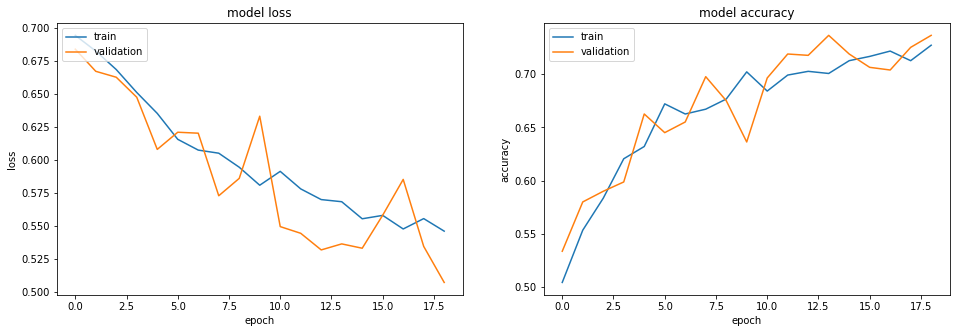

In [ ]:
plt.figure(figsize=(16,5))

# loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [ ]:
# model save
model.save('Cats_vs_Dogs_model.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:
# pred_generator 가 만들어낸 이미지를 모델을 통해 분류 예측
predictions = model.predict(pred_generator, steps=16, verbose=1)

16/16 [==============================] - 0s 6ms/step


In [ ]:
# predictions shape 확인
predictions.shape

(16, 1)

In [ ]:
# 예측 결과 확인
predictions

array([[0.9337723 ],
       [0.5334919 ],
       [0.61467993],
       [0.6601349 ],
       [0.88177264],
       [0.5043042 ],
       [0.09678255],
       [0.5578874 ],
       [0.5256283 ],
       [0.8379923 ],
       [0.2099013 ],
       [0.07911599],
       [0.6794517 ],
       [0.6781085 ],
       [0.76270926],
       [0.14311638]], dtype=float32)

In [ ]:
# pred_generator가 만든 이미지의 클래스 인덱스 확인
print(pred_generator.class_indices)

{'cat': 0, 'dog': 1}


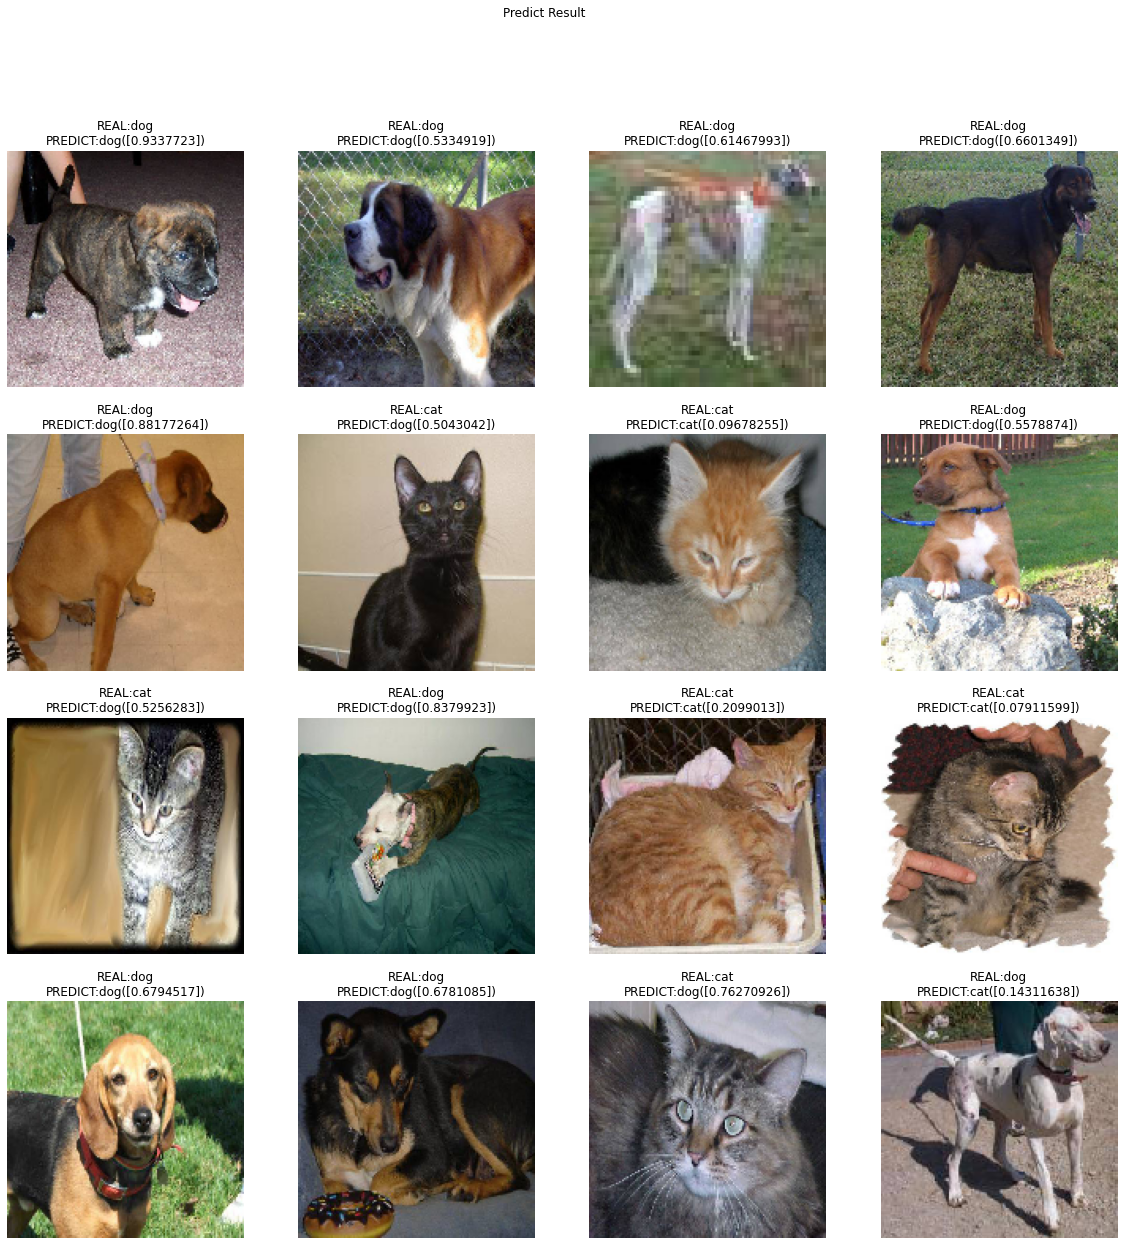

In [ ]:
# Predict Result(pred_generator가 만든 이미지를 모델을 통해 예측한 결과 확인)
f, ax = plt.subplots(4, 4, figsize=(20, 20))

for i in range(len(predictions)):
    image, label = pred_generator.next()               # pred_generator 가 만들어 낸 이미지를 하나씩 꺼내온다
    real_class = 'cat' if int(label) == 0 else 'dog'   # pred_generator 가 만들어 낸 이미지의 label name 을 가져옴
    ax[i//4,i%4].imshow(image[0])                      # pred_generator 가 만들어 낸 이미지를 보여줌
    ax[i//4,i%4].axis('off')

    pred_class = 'dog' if predictions[i] > 0.5 else 'cat' # pred_generator 가 만들어 낸 이미지를 모델을 통해 예측한 결과 값의 label name
    pred_prob = predictions[i]                            # pred_generator 가 만들어 낸 이미지를 모델을 통해 예측한 결과(확률값)
    ax[i//4,i%4].set_title('REAL:' + real_class + '\nPREDICT:' + pred_class + '(' + str(pred_prob) + ')')  # title 에 실제값과 모델에 의해 예측된 예측값을 함께 보여준다.

f.suptitle('Predict Result')

plt.show()

In [ ]:
# 저장된 모델 drive로 이동
!mv Cats_vs_Dogs_model.h5 /content/gdrive/MyDrive/CV/Cats\ vs\ Dogs/